In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import seaborn as sns

In [4]:
data = pd.read_csv("HourlyDataCleanedFinal.csv")

In [5]:
import matplotlib.pyplot as plt

# Lets merge the weather data now

In [7]:
weather = pd.read_csv("weather.csv")

In [8]:
weather.head()

,Unnamed: 0,Date,DailyRainfallTotal,Highest30MinRainfall,Highest60MinRainfall,Highest120MinRainfall,MeanTemperature,MaximumTemperature,MinimumTemperature,MeanWindSpeed,MaxWindSpeed
0,0,2018-06-01,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1
1,1,2018-06-02,5.8,1.4,2.6,4.6,27.7,29.7,24.1,9.7,58.7
2,2,2018-06-03,0.0,0.0,0.0,0.0,29.1,31.8,26.8,9.7,24.5
3,3,2018-06-04,0.6,0.6,0.6,0.6,29.6,31.2,26.0,9.7,36.7
4,4,2018-06-05,0.0,0.0,0.0,0.0,30.0,31.7,28.3,9.7,24.5


In [9]:
merged = data.merge(how="left", on="Date", right=weather)

## Only Hourly Energy has NA values


Lets start by dropping na columns, creating a train and test set, and testing the accuracy of different methods

In [10]:
merged.head()

,Date,Day of Week,Hour,WorkGroup,TotalEnergy,HourlyEnergy,Name,Weekend_Indicator,Treatment_A_Indicator,Treatment_B_Indicator,...,Unnamed: 0,DailyRainfallTotal,Highest30MinRainfall,Highest60MinRainfall,Highest120MinRainfall,MeanTemperature,MaximumTemperature,MinimumTemperature,MeanWindSpeed,MaxWindSpeed
0,2018-06-01,Friday,8.0,WORKGROUP-01,11.22,NaN,Ken,0,0,0,...,0,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1
1,2018-06-01,Friday,9.0,WORKGROUP-01,0.00,NaN,Ken,0,0,0,...,0,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1
2,2018-06-01,Friday,10.0,WORKGROUP-01,0.22,0.22,Ken,0,0,0,...,0,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1
3,2018-06-01,Friday,11.0,WORKGROUP-01,0.45,0.23,Ken,0,0,0,...,0,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1
4,2018-06-01,Friday,12.0,WORKGROUP-01,0.68,0.23,Ken,0,0,0,...,0,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1


In [11]:
no_na = merged.dropna()

In [12]:
no_na.loc[:,'Datetime'] = pd.to_datetime(no_na.loc[:,'Date'], format="%Y-%m-%d")

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
no_na.head()

,Date,Day of Week,Hour,WorkGroup,TotalEnergy,HourlyEnergy,Name,Weekend_Indicator,Treatment_A_Indicator,Treatment_B_Indicator,...,DailyRainfallTotal,Highest30MinRainfall,Highest60MinRainfall,Highest120MinRainfall,MeanTemperature,MaximumTemperature,MinimumTemperature,MeanWindSpeed,MaxWindSpeed,Datetime
2,2018-06-01,Friday,10.0,WORKGROUP-01,0.22,0.22,Ken,0,0,0,...,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1,2018-06-01
3,2018-06-01,Friday,11.0,WORKGROUP-01,0.45,0.23,Ken,0,0,0,...,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1,2018-06-01
4,2018-06-01,Friday,12.0,WORKGROUP-01,0.68,0.23,Ken,0,0,0,...,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1,2018-06-01
5,2018-06-01,Friday,13.0,WORKGROUP-01,0.91,0.23,Ken,0,0,0,...,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1,2018-06-01
6,2018-06-01,Friday,14.0,WORKGROUP-01,1.14,0.23,Ken,0,0,0,...,16.4,5.0,8.4,13.6,28.1,30.1,24.5,9.0,42.1,2018-06-01


In [15]:
len(no_na)

236198

In [17]:
no_na = no_na[no_na['OutOfOffice'] == 0]

In [18]:
no_na.columns

Index(['Date', 'Day of Week', 'Hour', 'WorkGroup', 'TotalEnergy',
       'HourlyEnergy', 'Name', 'Weekend_Indicator', 'Treatment_A_Indicator',
       'Treatment_B_Indicator', 'Treatment_control_Indicator',
       'Treatment_Administered_Indicator', 'NonParticipant', 'DailyLoginCount',
       'DailyDurationCount', 'OutOfOffice', 'Unnamed: 0', 'DailyRainfallTotal',
       'Highest30MinRainfall', 'Highest60MinRainfall', 'Highest120MinRainfall',
       'MeanTemperature', 'MaximumTemperature', 'MinimumTemperature',
       'MeanWindSpeed', 'MaxWindSpeed', 'Datetime'],
      dtype='object')

# Lets start doing some models

## Pretreatment

In [141]:
start_date = pd.to_datetime('2018-08-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2018-10-10', format='%Y-%m-%d')

is_before = (no_na['Datetime'] <= start_date)
is_during = ((no_na['Datetime'] > start_date) & (no_na['Datetime'] <= end_date))
is_after = (no_na['Datetime'] > end_date)

In [142]:
#lets start with the first period
period_data = no_na[is_before]
y = period_data["HourlyEnergy"]
X = period_data.drop(columns=["TotalEnergy", "Date", "WorkGroup"])
X = pd.concat([X, pd.get_dummies(X['Name'])], axis=1)
X = X.dropna(axis=1)
X = pd.concat([X, pd.get_dummies(X['Day of Week'])], axis=1)
X = X.drop(columns = ['Day of Week', 'OutOfOffice', 'Treatment_A_Indicator', 
                      'Treatment_B_Indicator', 'Treatment_control_Indicator', 'Treatment_Administered_Indicator',
                      'NonParticipant', 'DailyLoginCount', 'DailyDurationCount'])
X['Hour'] = X['Hour'].astype(int)
X = pd.concat([X, pd.get_dummies(X['Hour'], prefix='Hour')], axis=1)
X = X.drop(columns = ['Datetime', 'Hour'])

In [143]:
X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})
X = X.drop(columns=['Name'])

In [144]:
X.columns

Index(['HourlyEnergy', 'Weekend_Indicator', 'Unnamed: 0', 'DailyRainfallTotal',
       'Highest30MinRainfall', 'Highest60MinRainfall', 'Highest120MinRainfall',
       'MeanTemperature', 'MaximumTemperature', 'MinimumTemperature',
       'MeanWindSpeed', 'MaxWindSpeed', 'Ajeet', 'Ashish', 'Asit', 'Baison',
       'Benjamin', 'Caren', 'Chayle', 'Christopher', 'Daphne', 'Edwin', 'Giri',
       'Hoan', 'Keith', 'Ken', 'Manish', 'Ola', 'Pandarasamy', 'Prakhar',
       'Ramit', 'Sivaraam', 'Sneha', 'Toby', 'Vicky', 'Viveka', 'You',
       'Zuraimi', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [146]:
#lets first do a linear regression using the new module

In [147]:
#formula = 'HourlyEnergy ~ '
#start = True
#for each in X.columns:
#    if start:
#        start = False
#        formula = formula + each
#        continue
#    if each == 'HourlyEnergy':
 #       continue
#    formula = formula + '+' + each

In [148]:
formula

'HourlyEnergy ~ DailyRainfallTotal+Highest30MinRainfall+Highest60MinRainfall+Highest120MinRainfall+MeanTemperature+MaximumTemperature+MinimumTemperature+MeanWindSpeed+MaxWindSpeed+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Keith+Ken+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23'

In [149]:

formula_pre = 'HourlyEnergy ~ DailyRainfallTotal+Highest30MinRainfall+Highest60MinRainfall+Highest120MinRainfall+MeanTemperature+MaximumTemperature+MinimumTemperature+MeanWindSpeed+MaxWindSpeed+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Keith+Ken+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23'


In [150]:
formula_pre

'HourlyEnergy ~ DailyRainfallTotal+Highest30MinRainfall+Highest60MinRainfall+Highest120MinRainfall+MeanTemperature+MaximumTemperature+MinimumTemperature+MeanWindSpeed+MaxWindSpeed+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Keith+Ken+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23'

In [151]:
X_train.columns

Index(['HourlyEnergy', 'Weekend_Indicator', 'Unnamed: 0', 'DailyRainfallTotal',
       'Highest30MinRainfall', 'Highest60MinRainfall', 'Highest120MinRainfall',
       'MeanTemperature', 'MaximumTemperature', 'MinimumTemperature',
       'MeanWindSpeed', 'MaxWindSpeed', 'Ajeet', 'Ashish', 'Asit', 'Baison',
       'Benjamin', 'Caren', 'Chayle', 'Christopher', 'Daphne', 'Edwin', 'Giri',
       'Hoan', 'Keith', 'Ken', 'Manish', 'Ola', 'Pandarasamy', 'Prakhar',
       'Ramit', 'Sivaraam', 'Sneha', 'Toby', 'Vicky', 'Viveka', 'You',
       'Zuraimi', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [153]:
#a comment
results = smf.ols(formula_pre, data=X_train).fit()
#just a comment
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HourlyEnergy   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     249.7
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:21:55   Log-Likelihood:                -88413.
No. Observations:               19260   AIC:                         1.770e+05
Df Residuals:                   19196   BIC:                         1.775e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                13.0514      6.270      2.081      0.037       0.761      25.342
DailyRainfallTotal        0.5035      0.539      0.934      0.350      -0.553       1.560
Highest30MinRainfall     -1.1839      0.507     -2.336      0.020      -2.177      -0.190
Highest60MinRainfall      2.2099      0.828      2.670      0.008       0.588       3.832
Highest120MinRainfall    -1.6517      0.912     -1.811      0.070      -3.439       0.136
MeanTemperature          -2.7081      0.701     -3.862      0.000      -4.083      -1.334
MaximumTemperature        2.7647      0.549      5.038      0.000       1.689       3.840
MinimumTemperature       -0.1487      0.250     -0.594      0.552      -0.639       0.342
MeanWindSpeed             0.1813      0.101      1.793      0.073      -0.017       0.380
MaxWindSpeed              0.0075      0.038      0.199      0.842      -0.066       0.081
Ajeet                   -17.0675      0.993    -17.188      0.000     -19.014     -15.121
Ashish                   -7.4726      1.169     -6.393      0.000      -9.764      -5.181
Asit                     -7.1879      0.943     -7.622      0.000      -9.036      -5.339
Baison                   -8.7619      0.966     -9.067      0.000     -10.656      -6.868
Benjamin                -14.2560      3.126     -4.561      0.000     -20.382      -8.130
Caren                    -7.6185      0.961     -7.930      0.000      -9.502      -5.735
Chayle                   25.1027      0.906     27.698      0.000      23.326      26.879
Christopher              21.6738      0.909     23.837      0.000      19.892      23.456
Daphne                   28.5237      1.207     23.638      0.000      26.158      30.889
Edwin                    29.3036      0.792     37.011      0.000      27.752      30.856
Giri                    -12.7770      0.967    -13.210      0.000     -14.673     -10.881
Hoan                    -14.5735      0.914    -15.944      0.000     -16.365     -12.782
Keith                    -9.0923      0.919     -9.899      0.000     -10.893      -7.292
Ken                       1.0860      1.256      0.865      0.387      -1.376       3.548
Manish                   -1.8329      0.817     -2.244      0.025      -3.434      -0.232
Ola                     -13.7662      0.815    -16.888      0.000     -15.364     -12.168
Pandarasamy              -7.3585      0.804     -9.154      0.000      -8.934      -5.783
Prakhar                   7.2289      0.626     11.552      0.000       6.002       8.455
Ramit                     0.9409      0.955      0.985      0.325      -0.931       2.813
Sivaraam                 -3.2647      1.017     -3.210      0.001      -5.258      -1.271
Sneha                     1.9720      0.985      2.002      0.045       0.042       3.902
Toby                   

In [154]:
pred_pre_train = results.predict(X_train)

In [156]:
pre_train_mod=results

In [155]:
rmse = (mean_squared_error(pred_pre_train, y_train))**0.5 #rmse
mae = mean_absolute_error(pred_pre_train, y_train)
r2 = r2_score(y_train,pred_pre_train)
print(rmse, mae, r2)

23.844774442505145 17.39207956298387 0.45040776768404245


In [118]:
pred_pre_test = results.predict(X_test)

In [119]:

rmse = (mean_squared_error(pred_pre_test, y_test))**0.5 #rmse
mae = mean_absolute_error(pred_pre_test, y_test)
r2 = r2_score(y_test,pred_pre_test )
print(rmse, mae, r2)

23.690552662294134 17.1398273987032 0.458975921788484


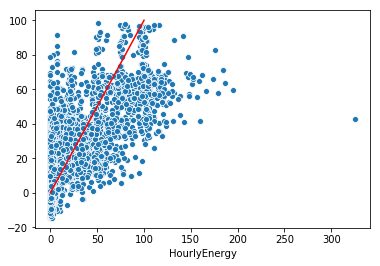

In [120]:
fig, ax = plt.subplots()
sns.scatterplot(y_test, pred_pre_test, ax = ax)
plt.plot(np.linspace(0,100), np.linspace(0, 100), color='r')

In [124]:
#now on to sklearn models
X_train = X_train.drop(columns=["HourlyEnergy"])
X_test = X_test.drop(columns=['HourlyEnergy'])

KeyError: "['HourlyEnergy'] not found in axis"

In [126]:
#k nearest neighbors
mod = KNeighborsRegressor(n_neighbors = 1)
mod.fit(X_train, y_train)
pred = mod.predict(X_test)

In [128]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

39.20415053493142 25.914360224925247 -0.4815977354375851


In [129]:
#K means
mod2 = KMeans(n_clusters=20)
mod2.fit(X_train, y_train)
pred = mod2.predict(X_test)

In [130]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test, pred)
print(rmse, mae, r2)

36.398328903301305 23.050330143602572 -0.27711233459758544


In [131]:
#rf regressor
mod4 = RandomForestRegressor()
mod4.fit(X_train, y_train)
pred = mod4.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test, pred)
print(rmse, mae, r2)

23.383858823047678 13.754290234963657 0.4728932593377019


In [133]:
#bagging
mod5 = BaggingRegressor()
mod5.fit(X_train, y_train)
pred = mod5.predict(X_test)

In [134]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

23.26797592774865 13.65341425011749 0.4781046577376339


In [135]:
#boosting
mod6 = GradientBoostingRegressor()
mod6.fit(X_train, y_train)
pred = mod6.predict(X_test)

In [136]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

23.06219175445639 17.038300730635356 0.48729521936983144


## DuringTreatment Ensemble +LR Model

['Hour',
 'HourlyEnergy',
 'Name',
 'Weekend_Indicator',
 'Treatment_A_Indicator',
 'Treatment_B_Indicator',
 'Treatment_control_Indicator',
 'NonParticipant',
 'DailyLoginCount',
 'DailyDurationCount',
 'MeanTemperature',
 'MaximumTemperature',
 'DailyRainfallTotal',
 'Highest30MinRainfall',
 'Highest60MinRainfall']

In [219]:
period_data = no_na[is_during]
y = period_data["HourlyEnergy"]
X = period_data.drop(columns=["TotalEnergy", "Date", "WorkGroup"])
X = pd.concat([X, pd.get_dummies(X['Name'])], axis=1)
X = X.dropna(axis=1)
X = X.drop(columns = ['Day of Week', 'OutOfOffice','Treatment_Administered_Indicator','Highest120MinRainfall','MinimumTemperature','MeanWindSpeed','MaxWindSpeed'])
X['Hour'] = X['Hour'].astype(int)
X = pd.concat([X, pd.get_dummies(X['Hour'], prefix='Hour')], axis=1)
X = X.drop(columns = ['Datetime', 'Hour'])
X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})
X = X.drop(columns=['Name'])

In [220]:
X.columns

Index(['HourlyEnergy', 'Weekend_Indicator', 'Treatment_A_Indicator',
       'Treatment_B_Indicator', 'Treatment_control_Indicator',
       'NonParticipant', 'DailyLoginCount', 'DailyDurationCount', 'Unnamed: 0',
       'DailyRainfallTotal', 'Highest30MinRainfall', 'Highest60MinRainfall',
       'MeanTemperature', 'MaximumTemperature', 'Ajeet', 'Ashish', 'Asit',
       'Baison', 'Benjamin', 'Caren', 'Chayle', 'Christopher', 'Daphne',
       'Edwin', 'Giri', 'Hoan', 'Jiayu', 'Keith', 'Ken', 'Manish', 'Ola',
       'Pandarasamy', 'Prakhar', 'Ramit', 'Sivaraam', 'Sneha', 'Toby', 'Vicky',
       'Viveka', 'You', 'Zuraimi', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [216]:
formula = 'HourlyEnergy ~ '
start = True
for each in X.columns:
    if start:
        start = False
        formula = formula + each
        continue
    if each == 'HourlyEnergy':
        continue
    formula = formula + '+' + each

In [224]:
formula_during = 'HourlyEnergy ~ Weekend_Indicator+Treatment_A_Indicator+Treatment_B_Indicator+Treatment_control_Indicator+NonParticipant+DailyLoginCount+DailyDurationCount+DailyRainfallTotal+Highest30MinRainfall+Highest60MinRainfall+MeanTemperature+MaximumTemperature+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Jiayu+Keith+Ken+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23'

In [225]:
#a comment
results = smf.ols(formula_during, data=X_train).fit()
#just a comment
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HourlyEnergy   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     794.8
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:58:06   Log-Likelihood:            -1.1277e+05
No. Observations:               22883   AIC:                         2.257e+05
Df Residuals:                   22823   BIC:                         2.262e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.0016      6.453      0.465      0.642      -9.646      15.649
Weekend_Indicator              -7.0994      0.762     -9.315      0.000      -8.593      -5.606
Treatment_A_Indicator         -11.0315      1.751     -6.301      0.000     -14.463      -7.600
Treatment_B_Indicator          -8.9425      1.865     -4.796      0.000     -12.597      -5.288
Treatment_control_Indicator   -11.4532      2.128     -5.382      0.000     -15.625      -7.282
NonParticipant                 34.4288      1.633     21.082      0.000      31.228      37.630
DailyLoginCount                -0.8761      0.464     -1.888      0.059      -1.785       0.033
DailyDurationCount             -0.0369      0.132     -0.279      0.780      -0.296       0.222
DailyRainfallTotal             -0.1251      0.127     -0.988      0.323      -0.373       0.123
Highest30MinRainfall            0.4879      0.174      2.808      0.005       0.147       0.829
Highest60MinRainfall           -0.3709      0.196     -1.897      0.058      -0.754       0.012
MeanTemperature                 2.4431      0.585      4.173      0.000       1.296       3.590
MaximumTemperature             -1.3299      0.503     -2.642      0.008      -2.317      -0.343
Ajeet                         -17.1946      1.306    -13.168      0.000     -19.754     -14.635
Ashish                         -7.8803      2.060     -3.825      0.000     -11.918      -3.842
Asit                          -11.8264      1.202     -9.841      0.000     -14.182      -9.471
Baison                         -5.9976      1.133     -5.291      0.000      -8.219      -3.776
Benjamin                      -15.0309      1.219    -12.326      0.000     -17.421     -12.641
Caren                         -11.0683      1.255     -8.817      0.000     -13.529      -8.608
Chayle                         29.4188      1.221     24.094      0.000      27.026      31.812
Christopher                    14.7694      1.177     12.544      0.000      12.462      17.077
Daphne                         19.1583      1.079     17.750      0.000      17.043      21.274
Edwin                          15.7768      1.658      9.517      0.000      12.527      19.026
Giri                          -16.5676      1.380    -12.007      0.000     -19.272     -13.863
Hoan                          -19.8939      1.365    -14.573      0.000     -22.570     -17.218
Jiayu                         217.5710      1.233    176.479      0.000     215.154     219.987
Keith                         -53.8531      1.110    -48.515      0.000     -56.029     -51.677
Ken                            -4.4503      1.268     -3.510      0.000      -6.936      -1.965
Manish                         -9.1921      1.351     -6.805      0.000     -11.840      -6.545
Ola        

In [226]:
pred_during_train = results.predict(X_train)

In [227]:
rmse = (mean_squared_error(pred_during_train, y_train))**0.5 #rmse
mae = mean_absolute_error(pred_during_train, y_train)
r2 = r2_score(y_train,pred_during_train)
print(rmse, mae, r2)

33.42641986465894 19.65014247781663 0.6726424719002386


In [228]:
pred_during_test = results.predict(X_test)

In [229]:

rmse = (mean_squared_error(pred_during_test, y_test))**0.5 #rmse
mae = mean_absolute_error(pred_during_test, y_test)
r2 = r2_score(y_test,pred_during_test )
print(rmse, mae, r2)

33.561907231099916 19.5184597542488 0.6660471976844549


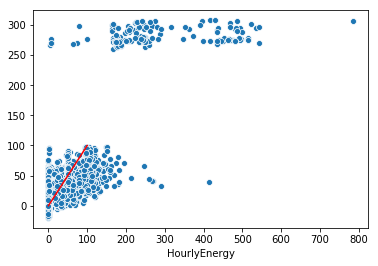

In [230]:
fig, ax = plt.subplots()
sns.scatterplot(y_test, pred_during_test, ax = ax)
plt.plot(np.linspace(0,100), np.linspace(0, 100), color='r')

In [231]:
#now on to sklearn models
X_train = X_train.drop(columns=["HourlyEnergy"])
X_test = X_test.drop(columns=['HourlyEnergy'])

In [232]:
#k nearest neighbors
mod = KNeighborsRegressor(n_neighbors = 1)
mod.fit(X_train, y_train)
pred = mod.predict(X_test)

In [233]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

41.18707965706269 23.117963248778185 0.4970627228292288


In [129]:
#K means
mod2 = KMeans(n_clusters=20)
mod2.fit(X_train, y_train)
pred = mod2.predict(X_test)

In [130]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test, pred)
print(rmse, mae, r2)

36.398328903301305 23.050330143602572 -0.27711233459758544


In [234]:
#rf regressor
mod4 = RandomForestRegressor()
mod4.fit(X_train, y_train)
pred = mod4.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [235]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test, pred)
print(rmse, mae, r2)

28.427147294099274 14.855690316262761 0.7604156827822558


In [133]:
#bagging
mod5 = BaggingRegressor()
mod5.fit(X_train, y_train)
pred = mod5.predict(X_test)

In [134]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

23.26797592774865 13.65341425011749 0.4781046577376339


In [236]:
#boosting
mod6 = GradientBoostingRegressor()
mod6.fit(X_train, y_train)
pred = mod6.predict(X_test)

In [237]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred)
print(rmse, mae, r2)

28.442560418890842 18.771000400417492 0.7601558083714365


## DuringTreatment, First Model Applied

In [159]:
period_data = no_na[is_during]
y = period_data["HourlyEnergy"]
X = period_data.drop(columns=["TotalEnergy", "Date", "WorkGroup"])
X = pd.concat([X, pd.get_dummies(X['Name'])], axis=1)
X = X.dropna(axis=1)
X = pd.concat([X, pd.get_dummies(X['Day of Week'])], axis=1)
X = X.drop(columns = ['Day of Week', 'OutOfOffice', 'Treatment_A_Indicator', 
                      'Treatment_B_Indicator', 'Treatment_control_Indicator', 'Treatment_Administered_Indicator',
                      'NonParticipant', 'DailyLoginCount', 'DailyDurationCount'])
X['Hour'] = X['Hour'].astype(int)
X = pd.concat([X, pd.get_dummies(X['Hour'], prefix='Hour')], axis=1)
X = X.drop(columns = ['Datetime', 'Hour'])
X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})
X = X.drop(columns=['Name'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [161]:
pred_during_byfirst=pre_train_mod.predict(X_test)

In [162]:
rmse = (mean_squared_error(pred_during_byfirst, y_test))**0.5 #rmse
mae = mean_absolute_error(pred_during_byfirst, y_test)
r2 = r2_score(y_test,pred_during_byfirst)
print(rmse, mae, r2)

55.6565279168679 25.24938067547512 0.08161655500749776


## Posttreatment

In [163]:
treatment_proportions = pd.read_csv('treatment_proportions.csv')

In [164]:
treatment_proportions

,Name,TreatmentA,TreatmentB,Control
0,Ken,0.875204,0.124796,0.000000
1,Sivaraam,0.218684,0.781316,0.000000
2,Sneha,0.236538,0.000000,0.763462
3,Christopher,0.794145,0.205855,0.000000
4,Giri,0.684932,0.315068,0.000000
5,Ajeet,1.000000,0.000000,0.000000
6,Chayle,0.673684,0.326316,0.000000
7,Ramit,0.324834,0.675166,0.000000
8,Prakhar,1.000000,0.000000,0.000000
9,Komang,1.000000,0.000000,0.000000


In [181]:
#lets do post treatment now
#lets start with the first period
period_data = no_na[is_after]
period_data = period_data.dropna()
y = period_data["HourlyEnergy"]
X = period_data.drop(columns=["TotalEnergy", "Date", "WorkGroup"])
X = pd.concat([X, pd.get_dummies(X['Name'])], axis=1)
X = X.dropna(axis=1)
# X = X.drop(columns=['Name'])
X = pd.concat([X, pd.get_dummies(X['Day of Week'])], axis=1)
X = X.drop(columns = ['Day of Week', 'OutOfOffice', 'Treatment_A_Indicator', 
                      'Treatment_B_Indicator', 'Treatment_control_Indicator',
                      'NonParticipant', 'DailyLoginCount', 'DailyDurationCount'])
X['Hour'] = X['Hour'].astype(int)
X = pd.concat([X, pd.get_dummies(X['Hour'], prefix='Hour')], axis=1)
X = X.drop(columns = ['Datetime', 'Hour'])
#X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})


In [182]:
X = X.merge(how="left", on='Name', right=treatment_proportions)

In [183]:
X = X.dropna()
y = X['HourlyEnergy']

,Name,TreatmentA,TreatmentB,Control
17,Jiayu,0.0,0.0,0.0


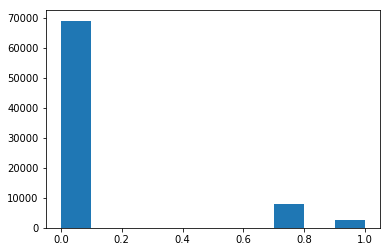

In [184]:
plt.hist(X['Control'])
treatment_proportions[treatment_proportions['Name'] == 'Jiayu']

In [169]:
X = X.drop(columns=['Name'])
X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
formula = 'HourlyEnergy ~ '
start = True
for each in X.columns:
    if start:
        start = False
        formula = formula + each
        continue
    if each == 'HourlyEnergy':
        continue
    formula = formula + '+' + each

In [174]:
#before
formula = 'HourlyEnergy~ Weekend_Indicator+DailyRainfallTotal+Highest60MinRainfall+Highest120MinRainfall+MeanTemperature+MaximumTemperature+MinimumTemperature+MeanWindSpeed+MaxWindSpeed+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Jiayu+Keith+Ken+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+TreatmentA+TreatmentB+Control'
#after

In [172]:
formula

'HourlyEnergy~ Weekend_Indicator+DailyRainfallTotal+Highest60MinRainfall+Highest120MinRainfall+MeanTemperature+MaximumTemperature+MinimumTemperature+MeanWindSpeed+MaxWindSpeed+Ajeet+Ashish+Asit+Baison+Benjamin+Caren+Chayle+Christopher+Daphne+Edwin+Giri+Hoan+Jiayu+Keith+Ken+Komang+Manish+Ola+Pandarasamy+Prakhar+Ramit+Sivaraam+Sneha+Toby+Vicky+Viveka+You+Zuraimi+Friday+Monday+Saturday+Sunday+Thursday+Tuesday+Wednesday+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+TreatmentA+TreatmentB+Control'

In [62]:
#treatment no treatment
#treatment A, treatment B, treatment Control
#proportion

In [175]:
results = smf.ols(formula, data=X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HourlyEnergy   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1039.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:43:01   Log-Likelihood:            -3.3568e+05
No. Observations:               63644   AIC:                         6.715e+05
Df Residuals:                   63585   BIC:                         6.720e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -54.8826      5.509     -9.963      0.000     -65.680     -44.086
Weekend_Indicator        -8.9105      0.692    -12.873      0.000     -10.267      -7.554
DailyRainfallTotal        0.8822      0.089      9.877      0.000       0.707       1.057
Highest60MinRainfall      0.3875      0.099      3.898      0.000       0.193       0.582
Highest120MinRainfall    -1.0447      0.127     -8.246      0.000      -1.293      -0.796
MeanTemperature           7.7026      0.466     16.546      0.000       6.790       8.615
MaximumTemperature       -1.4271      0.265     -5.393      0.000      -1.946      -0.908
MinimumTemperature       -1.0156      0.252     -4.027      0.000      -1.510      -0.521
MeanWindSpeed            -2.4787      0.086    -28.673      0.000      -2.648      -2.309
MaxWindSpeed             -0.0667      0.032     -2.085      0.037      -0.130      -0.004
Ajeet                   -16.2005      0.971    -16.682      0.000     -18.104     -14.297
Ashish                  -16.3468      0.792    -20.631      0.000     -17.900     -14.794
Asit                  -1.444e-14   9.22e-16    -15.666      0.000   -1.62e-14   -1.26e-14
Baison                 3.764e-14   7.05e-16     53.387      0.000    3.63e-14     3.9e-14
Benjamin                -36.6474      1.373    -26.698      0.000     -39.338     -33.957
Caren                 -3.802e-14   1.07e-15    -35.378      0.000   -4.01e-14   -3.59e-14
Chayle                   28.0525      0.717     39.145      0.000      26.648      29.457
Christopher               7.6444      0.807      9.470      0.000       6.062       9.227
Daphne                   -7.0821      0.988     -7.165      0.000      -9.019      -5.145
Edwin                    18.0524      0.755     23.912      0.000      16.573      19.532
Giri                     -6.1854      0.819     -7.550      0.000      -7.791      -4.580
Hoan                    -16.5344      0.844    -19.590      0.000     -18.189     -14.880
Jiayu                   156.4236      1.014    154.248      0.000     154.436     158.411
Keith                   -33.4562      1.041    -32.152      0.000     -35.496     -31.417
Ken                      -9.1215      0.989     -9.223      0.000     -11.060      -7.183
Manish                   -6.7820      0.860     -7.890      0.000      -8.467      -5.097
Ola                       0.2073      0.844      0.246      0.806      -1.448       1.863
Pandarasamy             -30.2373      1.152    -26.247      0.000     -32.495     -27.979
Prakhar                   8.5800      0.550     15.606      0.000       7.502       9.658
Ramit                    -7.4479      0.827     -9.004      0.000      -9.069      -5.827
Sivaraam                -16.5686      1.026    -16.151      0.000     -18.579     -14.558
Sneha                  

In [176]:
pred = results.predict(X_train)

In [178]:
rmse = (mean_squared_error(pred, y_train))**0.5 #rmse
mae = mean_absolute_error(pred, y_train)
r2 = r2_score(y_train,pred)
print(rmse, mae, r2)

47.24936718506169 23.442690945205637 0.4867009363489616


In [179]:
pred=results.predict(X_test)

In [180]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred )
print(rmse, mae, r2)

46.36738776743089 23.74804265583545 0.48530579553442665


In [68]:
#lets move on to some sklearn models

In [185]:
X_train = X_train.drop(columns=['HourlyEnergy'])
X_test = X_test.drop(columns=['HourlyEnergy'])

In [186]:
mod = KNeighborsRegressor(n_neighbors = 1)
mod.fit(X_train, y_train)
pred = mod.predict(X_test)

In [188]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred )
print(rmse, mae, r2)

56.22751108027513 21.164236831003024 0.24312922035508588


In [72]:
#next mod

In [73]:
#Kmeans is not a great fit for this

In [190]:
mod2 = KMeans(n_clusters=20)
mod2.fit(X_train, y_train)
pred = mod2.predict(X_test)

In [191]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score( y_test,pred)
print(rmse, mae, r2)

67.26420832200162 29.515007355254525 -0.0831586924332044


In [192]:
X_train = X_train.drop(columns=['Treatment_Administered_Indicator'])
X_test = X_test.drop(columns=['Treatment_Administered_Indicator'])

In [193]:
X_train = X_train.drop(columns=['Highest30MinRainfall'])
X_test = X_test.drop(columns=['Highest30MinRainfall'])

In [194]:
X_train = X_train.drop(columns=['Highest60MinRainfall'])
X_test = X_test.drop(columns=['Highest60MinRainfall'])

In [195]:
X_train = X_train.drop(columns=['Highest120MinRainfall'])
X_test = X_test.drop(columns=['Highest120MinRainfall'])

In [196]:
#rf regressor
mod4 = RandomForestRegressor()
mod4.fit(X_train, y_train)
pred = mod4.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred )
print(rmse, mae, r2)

31.115144646797212 13.224426015670375 0.7682244247096006


In [82]:
#how about BaggingRegressor, GradientBoostingRegressor, VotingRegressor

In [198]:
mod5 = BaggingRegressor()
mod5.fit(X_train, y_train)
pred = mod5.predict(X_test)

In [199]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred )
print(rmse, mae, r2)

31.652956724843627 13.314983934489872 0.7601428952081539


In [200]:
mod6 = GradientBoostingRegressor()
mod6.fit(X_train, y_train)
pred = mod6.predict(X_test)

In [201]:
rmse = (mean_squared_error(pred, y_test))**0.5 #rmse
mae = mean_absolute_error(pred, y_test)
r2 = r2_score(y_test,pred )
print(rmse, mae, r2)

39.11368952305048 20.069754556104773 0.6337466654715825


## PostTreatment, First Model Applied

In [202]:
period_data = no_na[is_after]
y = period_data["HourlyEnergy"]
X = period_data.drop(columns=["TotalEnergy", "Date", "WorkGroup"])
X = pd.concat([X, pd.get_dummies(X['Name'])], axis=1)
X = X.dropna(axis=1)
X = pd.concat([X, pd.get_dummies(X['Day of Week'])], axis=1)
X = X.drop(columns = ['Day of Week', 'OutOfOffice', 'Treatment_A_Indicator', 
                      'Treatment_B_Indicator', 'Treatment_control_Indicator', 'Treatment_Administered_Indicator',
                      'NonParticipant', 'DailyLoginCount', 'DailyDurationCount'])
X['Hour'] = X['Hour'].astype(int)
X = pd.concat([X, pd.get_dummies(X['Hour'], prefix='Hour')], axis=1)
X = X.drop(columns = ['Datetime', 'Hour'])
X = X.rename(columns={'Asit Mishra': "Asit", 'Baison Ning': "Baison", 'Caren Liew': "Caren", 'Toby Cheung': 'Toby', 'You Chun':'You'})
X = X.drop(columns=['Name'])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [204]:
pred_during_byfirst=pre_train_mod.predict(X_test)

In [205]:
rmse = (mean_squared_error(pred_during_byfirst, y_test))**0.5 #rmse
mae = mean_absolute_error(pred_during_byfirst, y_test)
r2 = r2_score(y_test,pred_during_byfirst)
print(rmse, mae, r2)

61.203669167335136 30.812993004450806 0.030966449282571973
